# 다중 분류(Multiclass Classification)
### 컬러 이미지 분류(**합성곱 신경망 CNN**)
---
- 데이터 셋: cifar-10
  - 컬러 이미지: 32, 32, 3

### 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# !nvidia-smi

### 데이터 준비
**Labels**

|Label|Description|
|:---:|:---:|
|0|airplane|
|1|automobile|
|2|bird|
|3|cat|
|4|deer|
|5|dog|
|6|frog|
|7|horse|
|8|ship|
|9|truck|

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
# 방법-1
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [5]:
# # 방법-2
# y_train = y_train.flatten()
# y_test = y_test.flatten()

In [6]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

- 이미지, 라벨 시각화

In [7]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
samples = np.random.randint(len(X_train), size=9)
samples

array([45382,  1700, 21966, 24384, 20346, 11979, 41233,  5404, 26185])

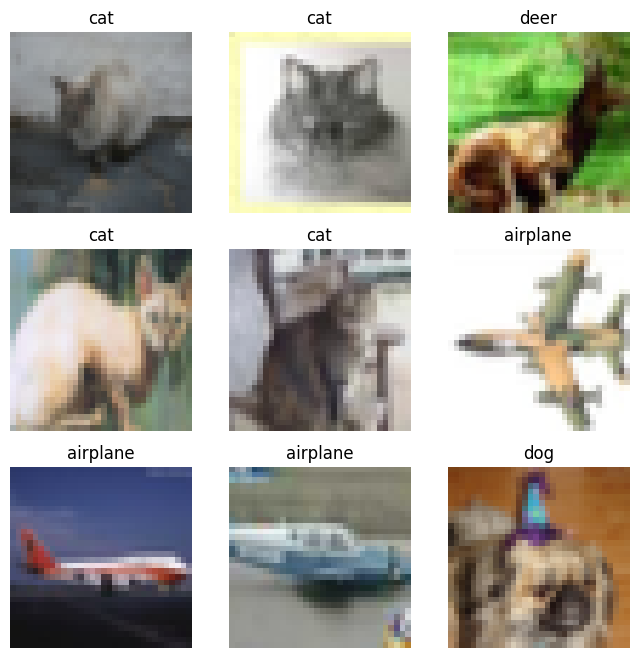

In [9]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx])
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.show()

### 데이터 분리
- 학습 데이터
- 검증 데이터

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.3,
                                                  random_state=1234)

print(X_train.shape, X_val.shape) 
print(y_train.shape, y_val.shape)

(35000, 32, 32, 3) (15000, 32, 32, 3)
(35000,) (15000,)


- 정규화: 최소-최대 정규화(Min-Max Scaler)

In [11]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

- 원-핫 인코딩(One-Hot Encoding)

In [12]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [13]:
y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [14]:
X_train.shape

(35000, 32, 32, 3)

### 1. 모델링(Modeling)

In [15]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation='relu', input_shape=(32, 32, 3)), 
    layers.MaxPool2D(2), 
    layers.Conv2D(64, 3, activation='relu'), 
    layers.MaxPool2D(2), 
    layers.Conv2D(128, 3, activation='relu'), 
    layers.MaxPool2D(2), 

    layers.Flatten(), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

컴파일(Compile)

In [17]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

학습(Training)

In [18]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val_oh), 
                    verbose=1)

Epoch 1/30
1094/1094 [==============================] - 21s 9ms/step - loss: 1.6218 - acc: 0.4057 - val_loss: 1.3070 - val_acc: 0.5309
Epoch 2/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2343 - acc: 0.5609 - val_loss: 1.1718 - val_acc: 0.5835
Epoch 3/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0691 - acc: 0.6219 - val_loss: 1.0676 - val_acc: 0.6305
Epoch 4/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9573 - acc: 0.6644 - val_loss: 1.0476 - val_acc: 0.6363
Epoch 5/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.8799 - acc: 0.6918 - val_loss: 0.9657 - val_acc: 0.6655
Epoch 6/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.8007 - acc: 0.7190 - val_loss: 0.9500 - val_acc: 0.6701
Epoch 7/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.7342 - acc: 0.7420 - val_loss: 0.8967 - val_acc: 0.6949
Epoch 8/30
1094/1094 [==============================] - 7s 6

- 학습 과정 시각화

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

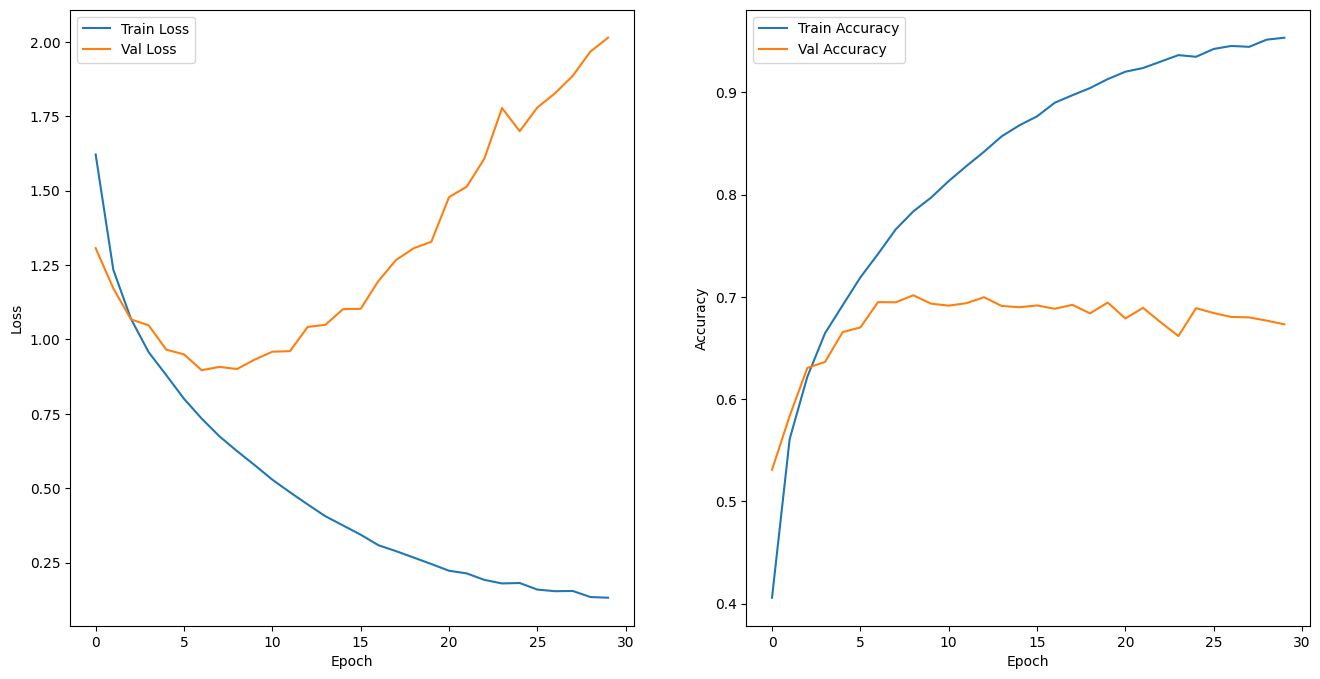

In [20]:
plot_history(history)

평가(Evaluation)

In [21]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 2.0364 - acc: 0.6749


[2.0363643169403076, 0.6748999953269958]

### 2. 모델링(Modeling)
<span style="color:blue">모델링(Modeling): Dropout(드롭아웃)</span>

In [22]:
model = keras.Sequential([
    layers.Conv2D(16, 3, activation='relu', input_shape=(32, 32, 3)), 
    layers.MaxPool2D(2), 
    layers.Dropout(0.3), 
    layers.Conv2D(64, 3, activation='relu'), 
    layers.MaxPool2D(2), 
    layers.Dropout(0.3), 
    layers.Conv2D(128, 3, activation='relu'), 
    layers.MaxPool2D(2), 
    layers.Dropout(0.3), 

    layers.Flatten(), 
    layers.Dropout(0.3), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

컴파일(Compile)

In [24]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

학습(Training)

In [25]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val_oh), 
                    verbose=1)

Epoch 1/30
1094/1094 [==============================] - 10s 7ms/step - loss: 1.8115 - acc: 0.3202 - val_loss: 1.5632 - val_acc: 0.4275
Epoch 2/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.5027 - acc: 0.4483 - val_loss: 1.3520 - val_acc: 0.5167
Epoch 3/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.3902 - acc: 0.4992 - val_loss: 1.2382 - val_acc: 0.5585
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.3186 - acc: 0.5273 - val_loss: 1.2128 - val_acc: 0.5650
Epoch 5/30
1094/1094 [==============================] - 6s 6ms/step - loss: 1.2731 - acc: 0.5400 - val_loss: 1.1253 - val_acc: 0.6099
Epoch 6/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.2390 - acc: 0.5543 - val_loss: 1.1622 - val_acc: 0.5866
Epoch 7/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2006 - acc: 0.5712 - val_loss: 1.0546 - val_acc: 0.6284
Epoch 8/30
1094/1094 [==============================] - 7s 6m

- 학습 과정 시각화

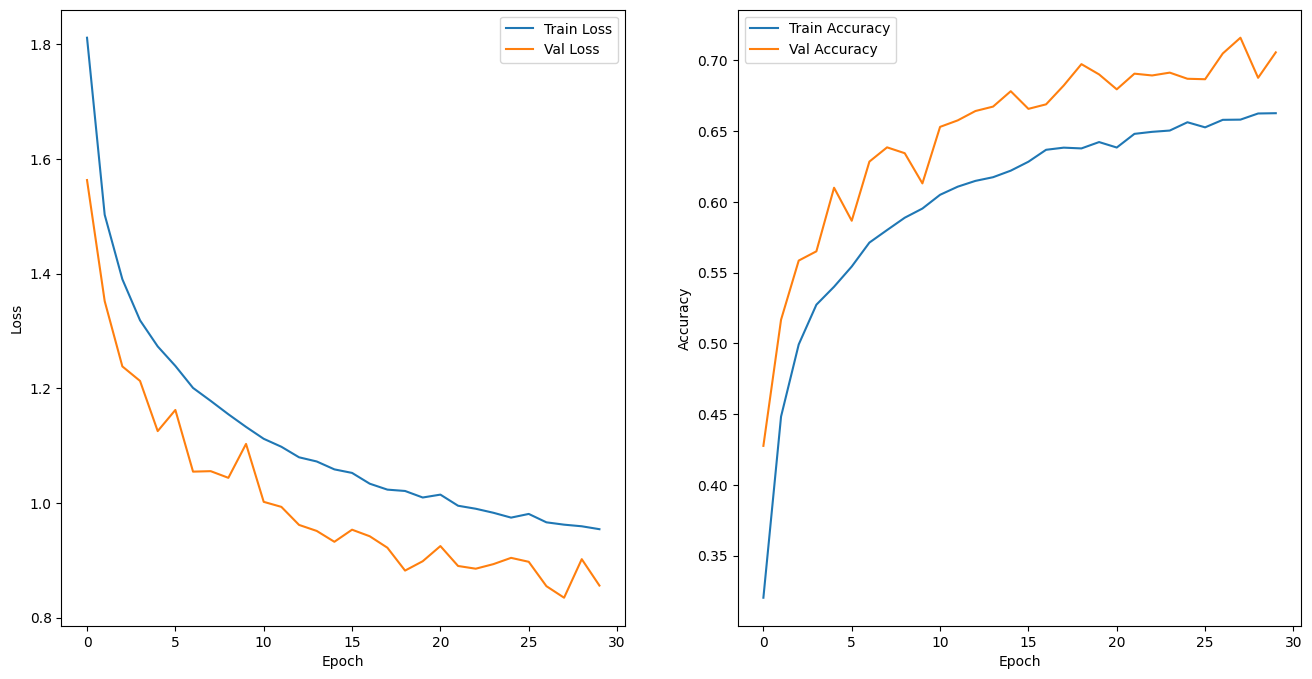

In [26]:
plot_history(history)

평가(Evaluation)

In [27]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.8587 - acc: 0.6977


[0.8586905002593994, 0.697700023651123]

### 3. 모델링(Modeling)
<span style="color:blue">모델링(Modeling): 배치 정규화(BatchNormalization)</span>

In [28]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32, 32, 3)), 
    layers.BatchNormalization(), 
    layers.ReLU(), # layers.Activation('relu')
    layers.MaxPool2D(2), 

    layers.Conv2D(64, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Conv2D(128, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Flatten(), 
    layers.Dropout(0.3), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        9280      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)      

컴파일(Compile)

In [30]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

학습(Training)

In [31]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val_oh), 
                    verbose=1)

Epoch 1/30
1094/1094 [==============================] - 11s 7ms/step - loss: 1.4887 - acc: 0.4610 - val_loss: 1.3050 - val_acc: 0.5279
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.1516 - acc: 0.5924 - val_loss: 1.3637 - val_acc: 0.5278
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.0166 - acc: 0.6425 - val_loss: 0.9445 - val_acc: 0.6675
Epoch 4/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9308 - acc: 0.6726 - val_loss: 1.3104 - val_acc: 0.5486
Epoch 5/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.8630 - acc: 0.6973 - val_loss: 1.1274 - val_acc: 0.6169
Epoch 6/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.8054 - acc: 0.7173 - val_loss: 1.1097 - val_acc: 0.6253
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.7523 - acc: 0.7367 - val_loss: 1.0635 - val_acc: 0.6531
Epoch 8/30
1094/1094 [==============================] - 7s 6m

- 학습 과정 시각화

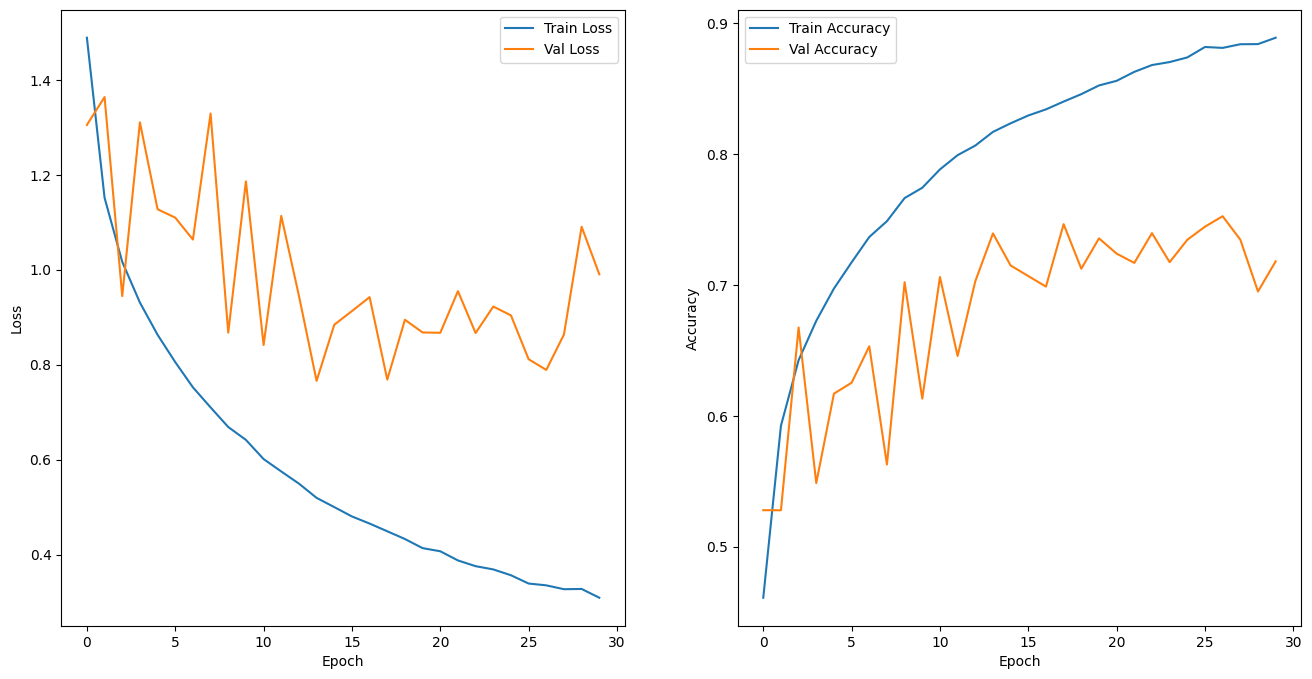

In [32]:
plot_history(history)

평가(Evaluation)

In [33]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 1.0047 - acc: 0.7149


[1.0047492980957031, 0.714900016784668]

### 4. 모델링(Modeling)
<span style="color:blue">컴파일(Compile): optimizer 변경➡️Adam 대신 RMSProp</span>

In [34]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32, 32, 3)), 
    layers.BatchNormalization(), 
    layers.ReLU(), # layers.Activation('relu')
    layers.MaxPool2D(2), 

    layers.Conv2D(64, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Conv2D(128, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Flatten(), 
    layers.Dropout(0.3), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 16)       64        
 hNormalization)                                                 
                                                                 
 re_lu_3 (ReLU)              (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        9280      
                                                                 
 batch_normalization_4 (Batc  (None, 13, 13, 64)      

컴파일(Compile)

In [36]:
model.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

학습(Training)

In [37]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val_oh), 
                    verbose=1)

Epoch 1/30
1094/1094 [==============================] - 10s 7ms/step - loss: 1.4800 - acc: 0.4671 - val_loss: 1.2114 - val_acc: 0.5693
Epoch 2/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.1514 - acc: 0.5923 - val_loss: 1.2482 - val_acc: 0.5655
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.0317 - acc: 0.6369 - val_loss: 1.2910 - val_acc: 0.5617
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.9438 - acc: 0.6716 - val_loss: 0.9972 - val_acc: 0.6508
Epoch 5/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.8719 - acc: 0.6919 - val_loss: 0.9900 - val_acc: 0.6473
Epoch 6/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.8152 - acc: 0.7127 - val_loss: 1.0193 - val_acc: 0.6467
Epoch 7/30
1094/1094 [==============================] - 6s 6ms/step - loss: 0.7723 - acc: 0.7309 - val_loss: 1.2832 - val_acc: 0.6001
Epoch 8/30
1094/1094 [==============================] - 7s 7m

- 학습 과정 시각화

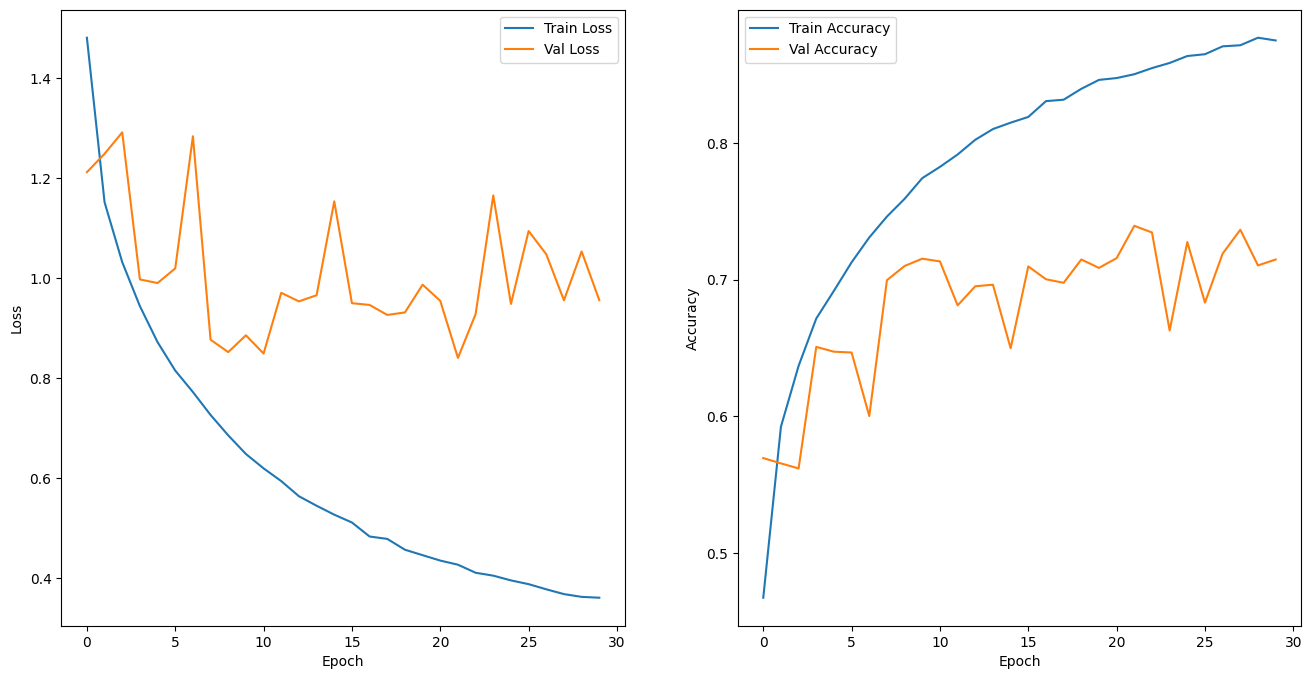

In [38]:
plot_history(history)

평가(Evaluation)

In [39]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.9764 - acc: 0.7112


[0.9764347672462463, 0.7111999988555908]

### 5. 모델링(Modeling)
<span style="color:blue">학습(Training): 콜백(Callback)</span>

In [40]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32, 32, 3)), 
    layers.BatchNormalization(), 
    layers.ReLU(), # layers.Activation('relu')
    layers.MaxPool2D(2), 

    layers.Conv2D(64, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Conv2D(128, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Flatten(), 
    layers.Dropout(0.3), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 16)       64        
 hNormalization)                                                 
                                                                 
 re_lu_6 (ReLU)              (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        9280      
                                                                 
 batch_normalization_7 (Batc  (None, 13, 13, 64)      

컴파일(Compile)

In [42]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

학습(Training)

In [43]:
from tensorflow.keras import callbacks

ckpt_path = 'cifar10.ckpt'

ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path, 
    monitor='val_loss', 
    save_weights_only=True, 
    save_best_only=True, 
    verbose=1
)

In [44]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val_oh), 
                    callbacks=[ckpt_callback], 
                    verbose=1)

Epoch 1/30
1092/1094 [============================>.] - ETA: 0s - loss: 1.4629 - acc: 0.4734
Epoch 1: val_loss improved from inf to 1.41437, saving model to cifar10.ckpt
1094/1094 [==============================] - 11s 7ms/step - loss: 1.4625 - acc: 0.4735 - val_loss: 1.4144 - val_acc: 0.4905
Epoch 2/30
1084/1094 [============================>.] - ETA: 0s - loss: 1.1496 - acc: 0.5927
Epoch 2: val_loss improved from 1.41437 to 1.32991, saving model to cifar10.ckpt
1094/1094 [==============================] - 7s 7ms/step - loss: 1.1491 - acc: 0.5929 - val_loss: 1.3299 - val_acc: 0.5238
Epoch 3/30
1087/1094 [============================>.] - ETA: 0s - loss: 1.0166 - acc: 0.6445
Epoch 3: val_loss improved from 1.32991 to 1.02724, saving model to cifar10.ckpt
1094/1094 [==============================] - 7s 6ms/step - loss: 1.0154 - acc: 0.6449 - val_loss: 1.0272 - val_acc: 0.6312
Epoch 4/30
1090/1094 [============================>.] - ETA: 0s - loss: 0.9258 - acc: 0.6749
Epoch 4: val_loss i

- 학습 과정 시각화

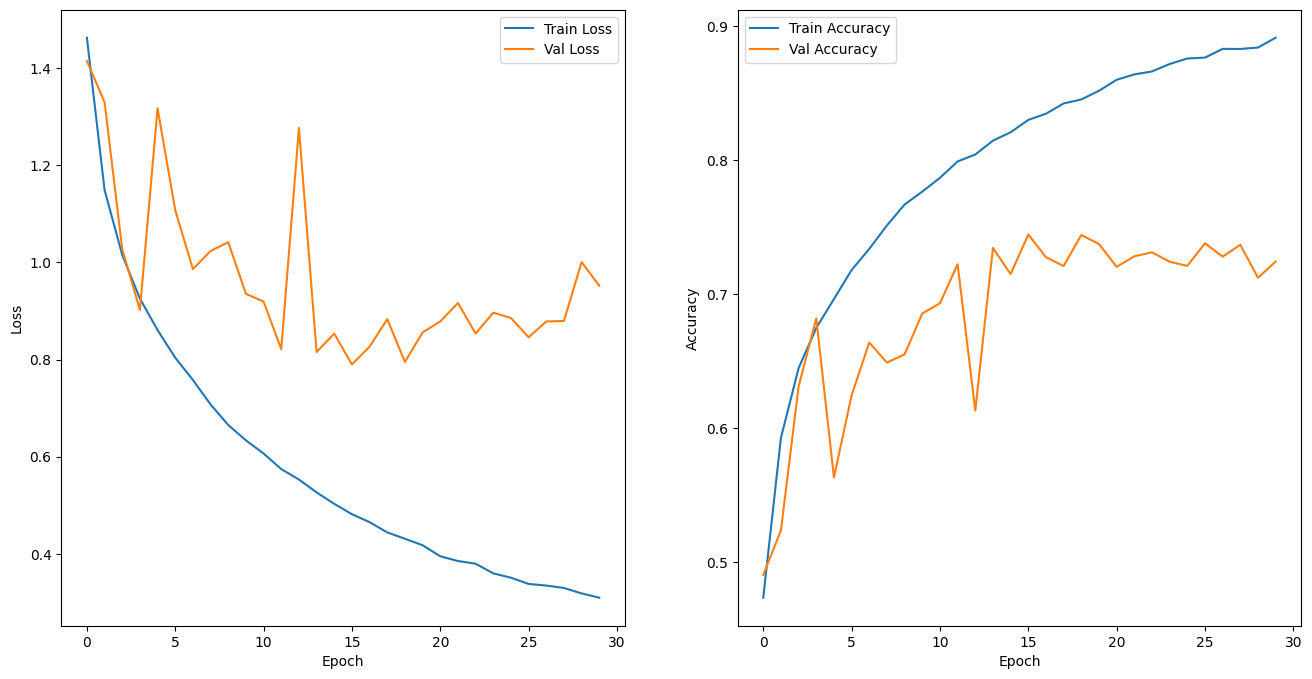

In [45]:
plot_history(history)

평가(Evaluation)

In [46]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.9598 - acc: 0.7267


[0.9597750902175903, 0.7267000079154968]

In [47]:
model.load_weights(ckpt_path)

In [48]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.8037 - acc: 0.7365


[0.8037199974060059, 0.7365000247955322]

### 6. 모델링(Modeling)
<span style="color:blue">학습(Training): EarlyStopping(강제 종료)</span>

In [49]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape=(32, 32, 3)), 
    layers.BatchNormalization(), 
    layers.ReLU(), # layers.Activation('relu')
    layers.MaxPool2D(2), 

    layers.Conv2D(64, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Conv2D(128, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Flatten(), 
    layers.Dropout(0.3), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 16)       64        
 hNormalization)                                                 
                                                                 
 re_lu_9 (ReLU)              (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        9280      
                                                                 
 batch_normalization_10 (Bat  (None, 13, 13, 64)      

컴파일(Compile)

In [51]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

학습(Training)

In [52]:
from tensorflow.keras import callbacks

ckpt_path = 'cifar10.ckpt'

ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path, 
    monitor='val_loss', 
    save_weights_only=True, 
    save_best_only=True, 
    verbose=1
)

es_callback = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5
)

In [53]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val_oh), 
                    callbacks=[ckpt_callback, es_callback], 
                    verbose=1)

Epoch 1/30
1088/1094 [============================>.] - ETA: 0s - loss: 1.4926 - acc: 0.4595
Epoch 1: val_loss improved from inf to 1.43242, saving model to cifar10.ckpt
1094/1094 [==============================] - 11s 7ms/step - loss: 1.4918 - acc: 0.4600 - val_loss: 1.4324 - val_acc: 0.4955
Epoch 2/30
1084/1094 [============================>.] - ETA: 0s - loss: 1.1567 - acc: 0.5893
Epoch 2: val_loss improved from 1.43242 to 1.19229, saving model to cifar10.ckpt
1094/1094 [==============================] - 7s 6ms/step - loss: 1.1552 - acc: 0.5896 - val_loss: 1.1923 - val_acc: 0.5719
Epoch 3/30
1087/1094 [============================>.] - ETA: 0s - loss: 1.0208 - acc: 0.6398
Epoch 3: val_loss improved from 1.19229 to 1.09892, saving model to cifar10.ckpt
1094/1094 [==============================] - 7s 7ms/step - loss: 1.0204 - acc: 0.6398 - val_loss: 1.0989 - val_acc: 0.6052
Epoch 4/30
1092/1094 [============================>.] - ETA: 0s - loss: 0.9261 - acc: 0.6756
Epoch 4: val_loss i

- 학습 과정 시각화

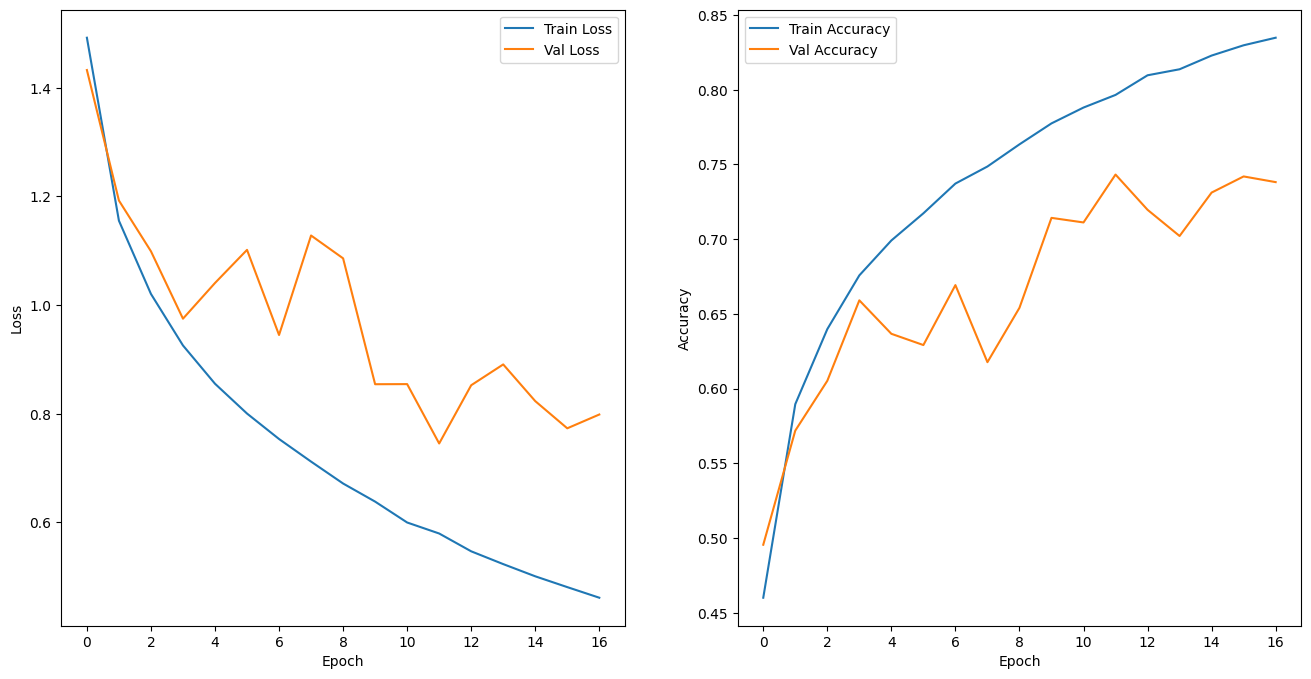

In [54]:
plot_history(history)

평가(Evaluation)

In [55]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.8075 - acc: 0.7390


[0.8075120449066162, 0.7390000224113464]

In [56]:
model.load_weights(ckpt_path)

In [57]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.7539 - acc: 0.7458


[0.7538987398147583, 0.7458000183105469]